In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

import scipy.stats as stats

# One Sample T-Tests

One Sample t-tests allow you to compare your sample mean to the population mean.

### Assumptions

1. Data is normally distributed
2. Data is independent
3. Data is randomly sampled

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_1samp.html

In [3]:
#files to load 

Crime_data_to_load = "data/Hate_crime.csv"

#read the csv files

crime_df = pd.read_csv(Crime_data_to_load)

#rename columns in crime_df dataframe
crime_df = crime_df.rename(columns={'INCIDENT_ID': 'ID', 'DATA_YEAR': 'Year', 'PUB_AGENCY_UNIT':'Agency Unit','PUB_AGENCY_NAME': 'Agency Name', 
                         'AGENCY_TYPE_NAME': 'Agency Type', 'STATE_ABBR': 'State Abbr.', 'STATE_NAME': 'State', 'DIVISION_NAME':'Division',
                         'REGION_NAME': 'Region', 'POPULATION_GROUP_CODE':'Pop. Group Code', 'POPULATION_GROUP_DESC':'Pop. Group Desc.',
                         'INCIDENT_DATE':'Incident Date','ADULT_VICTIM_COUNT': 'Adult Victim Count', 'JUVENILE_VICTIM_COUNT': 'Juvenile Victim Count',
                         'TOTAL_OFFENDER_COUNT': 'Total Offender Count', 'ADULT_OFFENDER_COUNT': 'Adult Offender Count', 
                         'JUVENILLE_OFFENDER_COUNT':'Juvenille Offender Count','OFFENDER_RACE':'Offender Race', 'OFFENDER_ETHNICITY': 'Offender Ethnicity', 
                         'VICTIM_COUNT': 'Victim Count', 'OFFENSE_NAME':'Offense Name', 'TOTAL_INDIVIDUAL_VICTIMS': 'Total Indiv. Victims',
                         'LOCATION_NAME': 'Location', 'BIAS_DESC':'Bias Desc', 'VICTIM_TYPES': 'Victim Type', 'MULTIPLE_OFFENSE': 
                         'Multiple Offense', 'MULTIPLE_BIAS': 'Multiple Bias', 'OFFENSE_NAME_1': 'Offense Categories', 'LOCATION_NAME_1': 'Location Categories'
                        }) 



crime_df.head()

,ID,Year,ORI,Agency Name,Agency Unit,Agency Type,State Abbr.,State,Division,Region,...,Victim Count,Offense Name,Total Indiv. Victims,Location,Bias Desc,Victim Type,Multiple Offense,Multiple Bias,Offense Categories,Location Categories
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S,Intimidation,Highway/Road/Alley/Street/Sidewalk
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,...,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S,Assault,Highway/Road/Alley/Street/Sidewalk
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S,Assault,Residence/Home
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S,Assault,Highway/Road/Alley/Street/Sidewalk
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S,Assault,Service/Gas Station


In [4]:
# extracting population
pop_cbym_df = pd.DataFrame(crime_df, columns = ['Year', 'State Abbr.','Incident Date','Total Offender Count'])

#Filter the data for  the year between 2014 to 2017
pop_cbym_df = pop_cbym_df[(pop_cbym_df.Year >= 2014)] 

pop_cc_by_state_df = pop_cbym_df.groupby(["State Abbr."])
pop_ccount =  pop_cc_by_state_df['Total Offender Count'].sum()
pop_ccount
pop_ccbsyr_df=pd.DataFrame({
                             'Total Offender count' : pop_ccount,
                             })

#Convert the index as the coloumns in the dataframe
pop_ccbsyr_df = pop_ccbsyr_df.reset_index(level=["State Abbr."])

pop_ccbsyr_df.head(100)

,State Abbr.,Total Offender count
0,AK,25
1,AL,42
2,AR,57
3,AZ,909
4,CA,3635
5,CO,441
6,CT,303
7,DC,529
8,DE,62
9,FL,407


In [5]:
# extracting sample
sam_cbym_df = pd.DataFrame(crime_df, columns = ['Year', 'State Abbr.','Incident Date','Total Offender Count'])

state_lst = ["CA", "MA", "CO", "OH", "MI"]

#Filter the data for CA and the year between 2014 to 2017
sam_cbym_df = sam_cbym_df[(sam_cbym_df.Year >= 2014)] 

sam_cbym_df = sam_cbym_df[sam_cbym_df['State Abbr.'].isin(state_lst)]

sam_cc_by_state_df = sam_cbym_df.groupby(["State Abbr."])
sam_ccount =  sam_cc_by_state_df['Total Offender Count'].sum()
sam_ccount
sam_ccbsyr_df=pd.DataFrame({
                             'Total Offender count' : sam_ccount,
                             })

#Convert the index as the coloumns in the dataframe
sam_ccbsyr_df = sam_ccbsyr_df.reset_index(level=["State Abbr."])

sam_ccbsyr_df.head(400)

,State Abbr.,Total Offender count
0,CA,3635
1,CO,441
2,MA,1095
3,MI,1356
4,OH,1493


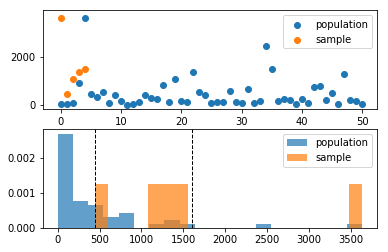

In [8]:
# Generate some data and show the scatter plot
#population, sample = gendata()

# Scatter Plot of Data
plt.subplot(2, 1, 1)
plt.scatter(range(len(pop_ccbsyr_df["Total Offender count"])), pop_ccbsyr_df["Total Offender count"], label="population")
plt.scatter(range(len(sam_ccbsyr_df["Total Offender count"])), sam_ccbsyr_df["Total Offender count"], label="sample")
plt.legend()

# Histogram Plot of Data
plt.subplot(2, 1, 2)
plt.hist(pop_ccbsyr_df["Total Offender count"], 20, density=True, alpha=0.7, label="population")
plt.hist(sam_ccbsyr_df["Total Offender count"], 20, density=True, alpha=0.7, label="sample")
plt.axvline(pop_ccbsyr_df["Total Offender count"].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(sam_ccbsyr_df["Total Offender count"].mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()  

In [7]:
stats.ttest_1samp(sam_ccbsyr_df["Total Offender count"], pop_ccbsyr_df["Total Offender count"].mean())

Ttest_1sampResult(statistic=2.144272939863221, pvalue=0.09861344955296641)